# **It is not complete yet and I am completing it**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

!pip3 install kmeans1d
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



     |████████████████████████████████| 93 kB 1.7 MB/s 


In [2]:
# Importing the libraries

plt.style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

#know we should import yfinance library to extract our bitcoin datas




In [3]:
!pip install  yfinance 
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe using pandas_datareader
data = pdr.get_data_yahoo("BTC-USD", start="2016-01-01", end="2022-5-8")
#BTC-USD
#GC=F
data.head()

     |████████████████████████████████| 6.4 MB 9.9 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


#Here we are calculateing Return rate

In [4]:
# Identify the Price variance for the each days
# Return = (Close price minus the Open price)/open price 
# Negative value indicate price has declined for that day and Positive value represent increase in price

data['Return'] = ((data["Close"] - data["Open"])/data["Open"])*100

print (data.head(10))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-01  430.721008  436.246002  427.515015  434.334015  434.334015   
2016-01-02  434.622009  436.062012  431.869995  433.437988  433.437988   
2016-01-03  433.578003  433.743011  424.705994  430.010986  430.010986   
2016-01-04  430.061005  434.516998  429.084015  433.091003  433.091003   
2016-01-05  433.069000  434.182007  429.675995  431.959991  431.959991   
2016-01-06  431.855988  431.855988  426.341003  429.105011  429.105011   
2016-01-07  430.010986  458.765991  429.076996  458.048004  458.048004   
2016-01-08  457.537994  462.933990  447.937988  453.230011  453.230011   
2016-01-09  453.382996  454.640015  446.889008  447.610992  447.610992   
2016-01-10  448.238007  448.308990  440.351013  447.990997  447.990997   

              Volume    Return  
Date                            
2016-01-01  36278900  0.838828  
2016-01-02  

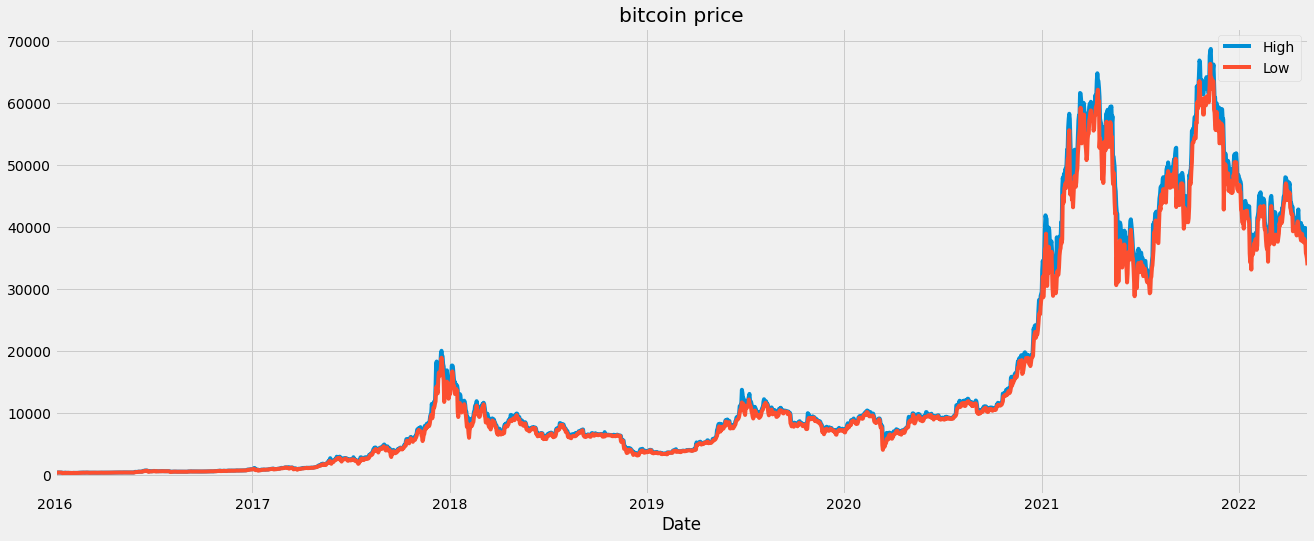

In [5]:
data["High"]['2016':].plot(figsize=(20,8),legend=True)
data["Low"]['2016':].plot(figsize=(20,8),legend=True)


plt.title('bitcoin price')
plt.show()

# know we are clustering bitcoins return rat data

In [6]:
import kmeans1d

k = 3

clusters, centroids = kmeans1d.cluster(data['Return'], k)

print(clusters)  
print(centroids) 

[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [7]:
data['clusters']= clusters

data.head()

,Open,High,Low,Close,Adj Close,Volume,Return,clusters
Date,,,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900,0.838828,1
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,-0.272425,1
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,-0.822693,1
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,0.704551,1
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,-0.256081,1


# but we can see that these tree clusters are imbalance and if we want to solve this problem we have some solutions.

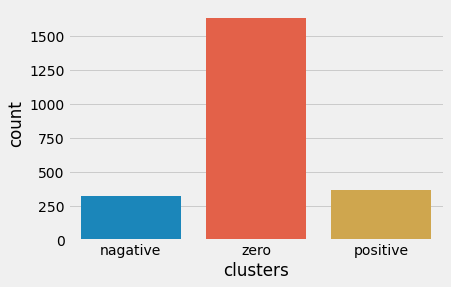

In [8]:
# visualize the target variable

g = sns.countplot(data['clusters'])
g.set_xticklabels(['nagative','zero','positive'])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score

In [10]:
from xgboost import XGBClassifier

steps = []
accuracy = []
i = 1


for i in range(5,100):
  X1 = data.drop(['clusters', 'Adj Close', 'Return'] , axis=1)
  Y1 = data ['clusters']


  Y1 = Y1.iloc[ -i : -1 ]
  X1 = X1.iloc[ -i : -1 ]

  X_train , X_test , Y_train , Y_test  =  train_test_split(X1 , Y1 , test_size =0.33)
      #X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

  xgb_model = XGBClassifier().fit(X_train, Y_train)

    # predict
  xgb_y_predict = xgb_model.predict(X_test)

    # accuracy score
  xgb_score = accuracy_score(xgb_y_predict, Y_test)

  steps.append(i)

  accuracy.append(xgb_score)


In [11]:
dataclasslist = { 'steps' : steps  , 'accuracy': accuracy}

In [12]:
dataclass = pd.DataFrame(dataclasslist)

dataclass.head()

,steps,accuracy
0,5,0.5
1,6,0.5
2,7,0.5
3,8,1.0
4,9,1.0


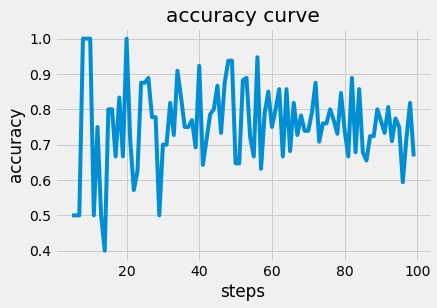

In [13]:
# plotting the points 
plt.plot(dataclass['steps'], dataclass['accuracy'] )
  
# naming the x axis
plt.xlabel('steps') #( number of datas which used in test And traian)
# naming the y axis
plt.ylabel('accuracy')
  
# giving a title to my graph
plt.title('accuracy curve')
  
# function to show the plot
plt.show()

In [14]:
# load library
from sklearn.svm import SVC

steps = []
accuracy = []
i = 1


for i in range(15,100):
  X2 = data.drop(['clusters', 'Adj Close', 'Return'] , axis=1)
  Y2 = data ['clusters']


  Y2 = Y2.iloc[ -i : -1 ]
  X2 = X2.iloc[ -i : -1 ]

  X_train , X_test , Y_train , Y_test  =  train_test_split(X2 , Y2 , test_size =0.33)
      #X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
  
  svc_model = SVC(class_weight='balanced', probability=True)

  svc_model.fit(X_train, Y_train)

  svc_predict = svc_model.predict(X_test)

    # accuracy score
  accuracys = accuracy_score(Y_test, svc_predict)

  steps.append(i)

  accuracy.append(accuracys)

In [15]:
dataclasslist = { 'steps' : steps  , 'accuracy': accuracy}

dataclass = pd.DataFrame(dataclasslist)

dataclass.head()

,steps,accuracy
0,15,0.400000
1,16,0.200000
2,17,0.833333
3,18,0.166667
4,19,0.333333


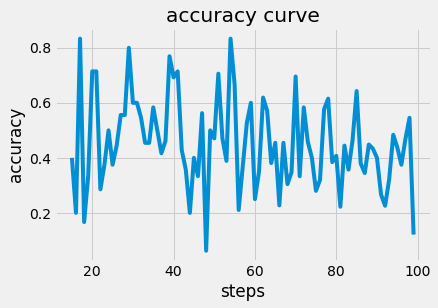

In [16]:
from IPython.core.pylabtools import figsize
from numpy.core.fromnumeric import size
# plotting the points 
plt.plot(dataclass['steps'], dataclass['accuracy'] )
  
# naming the x axis
plt.xlabel('steps') #( number of datas which used in test And traian)
# naming the y axis
plt.ylabel('accuracy')
  
# giving a title to my graph
plt.title('accuracy curve')
  
# function to show the plot
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier

steps = []
accuracy = []
i = 1


for i in range(15,100):
  X3 = data.drop(['clusters', 'Adj Close', 'Return'] , axis=1)
  Y3 = data ['clusters']

  Y3 = Y3.iloc[ -i : -1 ]
  X3 = X3.iloc[ -i : -1 ]

  X_train , X_test , Y_train , Y_test  =  train_test_split(X3 , Y3 , test_size =0.33)
      #X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
  
  rfc = RandomForestClassifier()

  # fit the predictor and target
  rfc.fit(X_train, Y_train)

  # predict
  rfc_predict = rfc.predict(X_test)# check performance
  #print('ROCAUC score:',roc_auc_score(Y_test, rfc_predict))

  # accuracy score
  accuracys = accuracy_score(Y_test, rfc_predict)

  steps.append(i)

  accuracy.append(accuracys)

In [18]:
dataclasslist = { 'steps' : steps  , 'accuracy': accuracy}

dataclass = pd.DataFrame(dataclasslist)

dataclass.head()

,steps,accuracy
0,15,0.400000
1,16,1.000000
2,17,0.500000
3,18,0.666667
4,19,1.000000


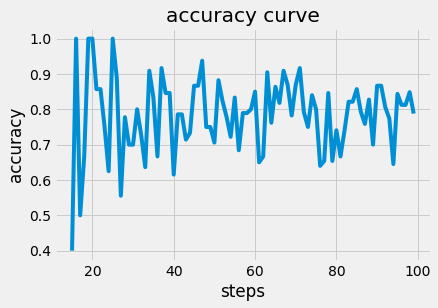

In [19]:
from IPython.core.pylabtools import figsize
from numpy.core.fromnumeric import size
# plotting the points 
plt.plot(dataclass['steps'], dataclass['accuracy'] )
  
# naming the x axis
plt.xlabel('steps') #( number of datas which used in test And traian)
# naming the y axis
plt.ylabel('accuracy')
  
# giving a title to my graph
plt.title('accuracy curve')
  
# function to show the plot
plt.show()

# As it was observed, the imbalance in the clustered data leads to very high accuracy and very low accuracy in the algorithms, to solve this problem we can use the following methods.

# **# Resampling Technique**

# In these methods, due to the increase and decrease of data, we may no longer be able to review recent days because the relevant data may have been deleted.
#And given this weakness in this method (of course we are able to predict based on the whole data set) we have to look for another solution to the problem of data imbalance.

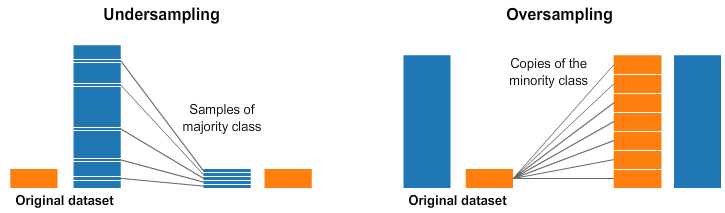

In [20]:
data['clusters'].value_counts()

1    1631
2     367
0     322
Name: clusters, dtype: int64

In [21]:
# class count
class_count_0, class_count_1, class_count_2 = data['clusters'].value_counts()

# Separate class
class_0 = data[data['clusters'] == 0]
class_1 = data[data['clusters'] == 1]# print the shape of the class
class_2 = data[data['clusters'] == 2]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)

class 0: (322, 8)
class 1: (1631, 8)
class 2: (367, 8)


In [22]:
class_count_1

367

# **1. Random Under-Sampling**

total class of 1 and 2 and 0 : 1    367
2    367
0    322
Name: clusters, dtype: int64


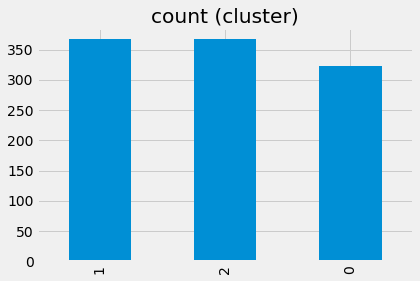

In [23]:
class_1_under = class_1.sample(class_count_1,replace=True)

test_under = pd.concat([class_0,class_1_under ,class_2], axis=0)

print("total class of 1 and 2 and 0 :",test_under['clusters'].value_counts())# plot the count after under-sampeling

test_under['clusters'].value_counts().plot(kind='bar', title='count (cluster)')

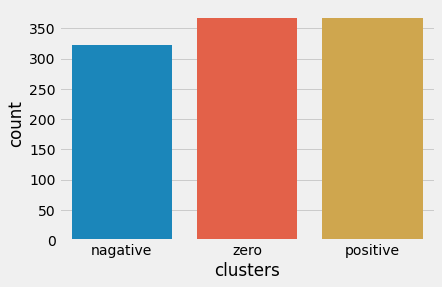

In [24]:
 #visualize the target variable
g = sns.countplot(test_under['clusters'])
g.set_xticklabels(['nagative','zero','positive'])
plt.show()

In [25]:
test_under.head()

,Open,High,Low,Close,Adj Close,Volume,Return,clusters
Date,,,,,,,,
2016-01-15,430.255005,430.255005,364.330994,364.330994,364.330994,153351008,-15.322079,0
2016-01-22,409.751007,410.410004,375.282013,382.492004,382.492004,91546600,-6.652577,0
2016-01-28,395.145996,395.502014,379.734985,380.289001,380.289001,59247900,-3.759875,0
2016-02-23,438.255005,439.858002,417.821014,420.735992,420.735992,85244896,-3.997447,0
2016-04-27,466.261993,467.079010,444.134003,444.687012,444.687012,93564896,-4.627223,0


In [26]:
data.shape

(2320, 8)

In [27]:
test_under.shape 

(1056, 8)

In [28]:
from xgboost import XGBClassifier

X1 = test_under.drop(['clusters', 'Adj Close', 'Return'] , axis=1)
Y1 = test_under ['clusters']

X_train , X_test , Y_train , Y_test  =  train_test_split(X1 , Y1 , test_size =0.33)
      #X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
xgb_model = XGBClassifier().fit(X_train, Y_train)

    # predict
xgb_y_predict = xgb_model.predict(X_test)

    # accuracy score
xgb_score = accuracy_score(xgb_y_predict, Y_test)

xgb_score


0.6131805157593123

# **2. Random Over-Sampling**

total class of 1 and 0: 0    1631
1    1631
2    1631
Name: clusters, dtype: int64


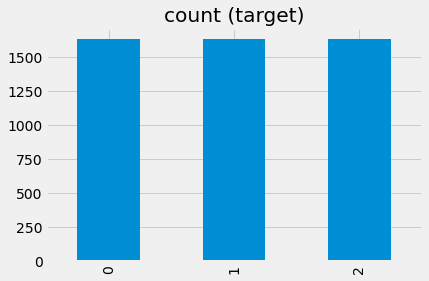

In [29]:
class_0_over = class_0.sample(class_count_0, replace=True)
class_2_over = class_2.sample(class_count_0, replace=True)

test_over = pd.concat([class_0_over, class_1, class_2_over], axis=0)  # 

print("total class of 1 and 0:",test_over['clusters'].value_counts())# plot the count after under-sampeling
test_over['clusters'].value_counts().plot(kind='bar', title='count (target)')

In [30]:
from xgboost import XGBClassifier

X1 = test_over.drop(['clusters', 'Adj Close', 'Return'] , axis=1)
Y1 = test_over ['clusters']

X_train , X_test , Y_train , Y_test  =  train_test_split(X1 , Y1 , test_size =0.33)
      #X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
xgb_model = XGBClassifier().fit(X_train, Y_train)

    # predict
xgb_y_predict = xgb_model.predict(X_test)

    # accuracy score
xgb_score = accuracy_score(xgb_y_predict, Y_test)

xgb_score

0.7975232198142415

**end of these tow methods**

#Neural Networks LSTM

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test  =  train_test_split(X1 , Y1 , test_size =0.33)

In [32]:
print("size of training dataset is :" + str(X_train.shape))
print("size of test dataset is :" + str(X_test.shape))

size of training dataset is :(3278, 5)
size of test dataset is :(1615, 5)


In [33]:
# The LSTM architecture
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
a=regressor.fit(X_train,Y_train,epochs=50,batch_size=32)

Epoch 1/50
103/103 [==============================] - 17s 14ms/step - loss: 0.7126
Epoch 2/50
103/103 [==============================] - 1s 14ms/step - loss: 0.6833
Epoch 3/50
103/103 [==============================] - 1s 14ms/step - loss: 0.6872
Epoch 4/50
103/103 [==============================] - 1s 14ms/step - loss: 0.6870
Epoch 5/50
103/103 [==============================] - 1s 14ms/step - loss: 0.6839
Epoch 6/50
103/103 [==============================] - 1s 14ms/step - loss: 0.6809
Epoch 7/50
103/103 [==============================] - 1s 14ms/step - loss: 0.6811
Epoch 8/50
103/103 [==============================] - 1s 14ms/step - loss: 0.6787
Epoch 9/50
103/103 [==============================] - 1s 14ms/step - loss: 0.6768
Epoch 10/50
103/103 [==============================] - 1s 14ms/step - loss: 0.6773
Epoch 11/50
103/103 [==============================] - 1s 13ms/step - loss: 0.6771
Epoch 12/50
103/103 [==============================] - 1s 14ms/step - loss: 0.6781
Epoch 13/50


 **I am looking for a method to solve the problem of data imbalance by weighting the classes ...**  ⏫ ⏫

 **continues ...**